In [1]:
#  Import some librarys and read and display the data
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('loan_data_1.csv')

display(df.sample(5))

Unnamed: 0   Loan_ID  Gender Married Dependents Education Self_Employed  \
251         251  LP002281    Male     Yes          0  Graduate            No   
324         324  LP002648    Male     Yes          0  Graduate            No   
233         233  LP002209  Female      No          0  Graduate           NaN   
312         312  LP002585    Male     Yes          0  Graduate            No   
265         265  LP002347    Male     Yes          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
251           3033.0             1459.0        95.0             360.0   
324           2130.0             6666.0        70.0             180.0   
233           2764.0             1459.0       110.0             360.0   
312           3597.0             2157.0       119.0             360.0   
265           3246.0             1417.0       138.0             360.0   

     Credit_History Property_Area Loan_Status  
251             1.0         Urban           Y  
324             1.0     Semiurban           N  
233             1.0         Urban           Y  
312             0.0         Rural           N  
265             1.0     Semiurban           Y

In [2]:
#  removing unvaluable features
df.drop(['Unnamed: 0','Loan_ID'],inplace=True,axis=1)
display(df.select_dtypes(include='object').describe())    
display(display(df.select_dtypes(include='object').describe()))

Gender Married Dependents Education Self_Employed Property_Area  \
count     376     381        373       375           360           381   
unique      2       2          4         2             2             3   
top      Male     Yes          0  Graduate            No     Semiurban   
freq      291     228        234       274           325           149   

       Loan_Status  
count          381  
unique           2  
top              Y  
freq           271

Gender Married Dependents Education Self_Employed Property_Area  \
count     376     381        373       375           360           381   
unique      2       2          4         2             2             3   
top      Male     Yes          0  Graduate            No     Semiurban   
freq      291     228        234       274           325           149   

       Loan_Status  
count          381  
unique           2  
top              Y  
freq           271

None

In [3]:
#  Classifying the data type
print('Variable:              type:')
variables=[i for i in df.columns]
nn='nominal'
od='ordinal'
nr='numirical'
types=[nn,nn,od,od,nn,nr,nr,nr,nr,nr,nn,nn]
j=0
for i in  variables:
    print('%-17s '%i,'|   %-16s'%types[j])
    j+=1

Variable:              type:
Gender             |   nominal         
Married            |   nominal         
Dependents         |   ordinal         
Education          |   ordinal         
Self_Employed      |   nominal         
ApplicantIncome    |   numirical       
CoapplicantIncome  |   numirical       
LoanAmount         |   numirical       
Loan_Amount_Term   |   numirical       
Credit_History     |   numirical       
Property_Area      |   nominal         
Loan_Status        |   nominal         


In [4]:
#  filling the missing data
display(df.isna().sum())
null_columns=df.columns[df.isna().any()]
print('columns with missing data are:', null_columns)    
catgoricalC=['Gender', 'Education', 'Self_Employed','Credit_History','Dependents']
nmC=['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for i in null_columns:
    if i in nmC:
        value = df[i].mean()
    else:
        value = df[i].mode()
        value=value[0]
    df[i].fillna(value,inplace=True)
display(df)

Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

columns with missing data are: Index(['Gender', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')


Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male     Yes          1      Graduate            No           4583.0   
1      Male     Yes          0      Graduate           Yes           3000.0   
2      Male     Yes          0  Not Graduate            No           2583.0   
3      Male      No          0      Graduate            No           6000.0   
4      Male     Yes          0  Not Graduate            No           2333.0   
..      ...     ...        ...           ...           ...              ...   
376    Male     Yes         3+      Graduate            No           5703.0   
377    Male     Yes          0      Graduate            No           3232.0   
378  Female      No          0      Graduate            No           2900.0   
379    Male     Yes         3+      Graduate            No           4106.0   
380  Female      No          0      Graduate           Yes           4583.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          1508.000000       128.0             360.0             1.0   
1             0.000000        66.0             360.0             1.0   
2          2358.000000       120.0             360.0             1.0   
3             0.000000       141.0             360.0             1.0   
4          1516.000000        95.0             360.0             1.0   
..                 ...         ...               ...             ...   
376           0.000000       128.0             360.0             1.0   
377        1267.005289       108.0             360.0             1.0   
378           0.000000        71.0             360.0             1.0   
379           0.000000        40.0             180.0             1.0   
380           0.000000       133.0             360.0             0.0   

    Property_Area Loan_Status  
0           Rural           N  
1           Urban           Y  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
376         Urban           Y  
377         Rural           Y  
378         Rural           Y  
379         Rural           Y  
380     Semiurban           N  

[381 rows x 12 columns]

In [5]:
#  correcting the inconsistency in loan amount term column
df['Loan_Amount_Term']=df['Loan_Amount_Term'].apply(lambda x: 10*x if x%30!=0 else x)
# there where some data consisting of numbers that can not be number of months and indicating missing zero at the end like instead of 120 it was 12

In [6]:
#  Solving the inconsistency in dependents column
def strToInt(i):
    if i=='3+':
        i=3
    else:
        i=int(i)
    return i
df['Dependents']=df['Dependents'].apply(lambda x: strToInt(x))                       
display(df.sample(5))

Gender Married  Dependents Education Self_Employed  ApplicantIncome  \
245    Male     Yes           0  Graduate            No      3563.422764   
17     Male     Yes           0  Graduate            No      2799.000000   
90   Female     Yes           0  Graduate            No      2330.000000   
124  Female      No           0  Graduate            No      3244.000000   
87     Male     Yes           2  Graduate           Yes      3316.000000   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
245                0.0       125.0             360.0             1.0   
17              2253.0       122.0             360.0             1.0   
90              4486.0       100.0             360.0             1.0   
124                0.0        80.0             360.0             1.0   
87              3500.0        88.0             360.0             1.0   

    Property_Area Loan_Status  
245         Rural           Y  
17      Semiurban           Y  
90      Semiurban           Y  
124         Urban           Y  
87          Urban           Y

In [7]:
#  Removing numerical outlliers (except from loan_amount_term column because it will result in a great loss of data since its IQR=0)
display(df.info())
nmC=['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in nmC:
    Q3,Q1=np.percentile(df[i], [75 ,25])
    print(Q3,Q1)
    IQR=Q3-Q1
    index_row=df[df[i]>(Q3+1.5*IQR)].index
    df.drop(index_row,inplace=True)
    index_row=df[df[i] <(Q1-1.5*IQR)].index
    df.drop(index_row,inplace=True)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    int64  
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    float64
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 35.8+ KB


None

4188.0 2600.0
1996.5 0.0
125.25 90.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             347 non-null    object 
 1   Married            347 non-null    object 
 2   Dependents         347 non-null    int64  
 3   Education          347 non-null    object 
 4   Self_Employed      347 non-null    object 
 5   ApplicantIncome    347 non-null    float64
 6   CoapplicantIncome  347 non-null    float64
 7   LoanAmount         347 non-null    float64
 8   Loan_Amount_Term   347 non-null    float64
 9   Credit_History     347 non-null    float64
 10  Property_Area      347 non-null    object 
 11  Loan_Status        347 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 35.2+ KB


None

In [8]:
#Find the statistical summaries.
print("statistic data\n\n ")
display(df.describe())
print("categorical data :\n")
numirecal_columns=df.select_dtypes(exclude='object')
categorical_columns = df.select_dtypes(include='object')
for column in categorical_columns:
    print(f"value counts for {column}:")
    print(df[column].value_counts())
    print("\n")  


statistic data

 


Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  347.000000       347.000000         347.000000  347.000000   
mean     0.665706      3426.567934        1103.625404  106.193988   
std      0.987233      1082.568606        1154.102943   25.683623   
min      0.000000       645.000000           0.000000   40.000000   
25%      0.000000      2610.000000           0.000000   94.000000   
50%      0.000000      3333.000000        1213.000000  110.000000   
75%      1.000000      4004.500000        1946.500000  126.000000   
max      3.000000      6500.000000        4490.000000  150.000000   

       Loan_Amount_Term  Credit_History  
count        347.000000      347.000000  
mean         440.249241        0.844380  
std          516.991985        0.363018  
min          120.000000        0.000000  
25%          360.000000        1.000000  
50%          360.000000        1.000000  
75%          360.000000        1.000000  
max         3408.648649        1.000000

categorical data :

value counts for Gender:
Male      270
Female     77
Name: Gender, dtype: int64


value counts for Married:
Yes    209
No     138
Name: Married, dtype: int64


value counts for Education:
Graduate        256
Not Graduate     91
Name: Education, dtype: int64


value counts for Self_Employed:
No     319
Yes     28
Name: Self_Employed, dtype: int64


value counts for Property_Area:
Semiurban    138
Urban        112
Rural         97
Name: Property_Area, dtype: int64


value counts for Loan_Status:
Y    247
N    100
Name: Loan_Status, dtype: int64




numircal data in histograghs


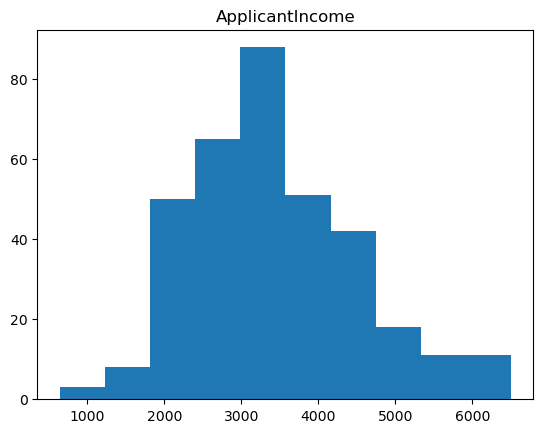

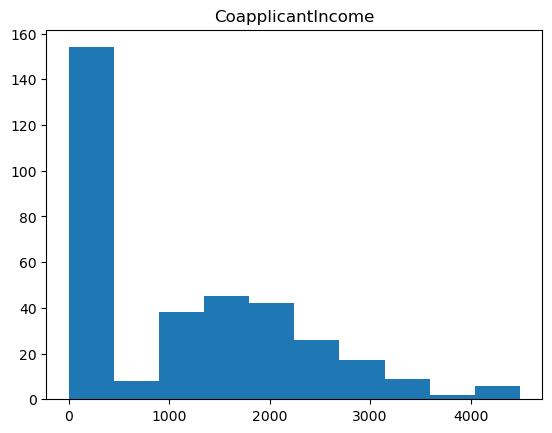

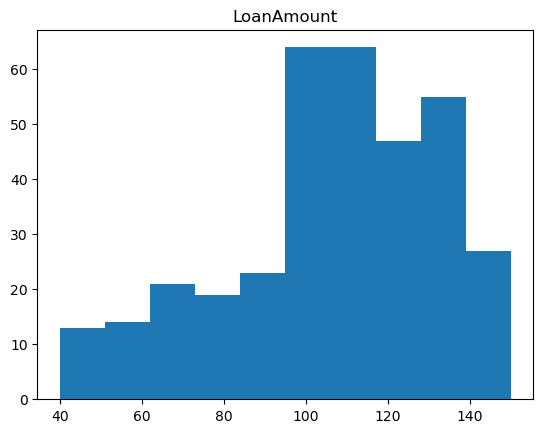

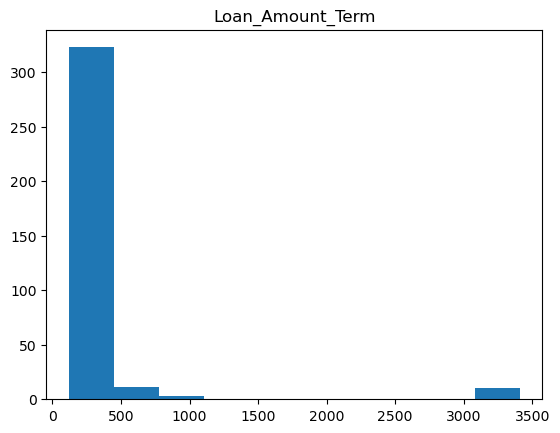

catagorical columns using pie chart


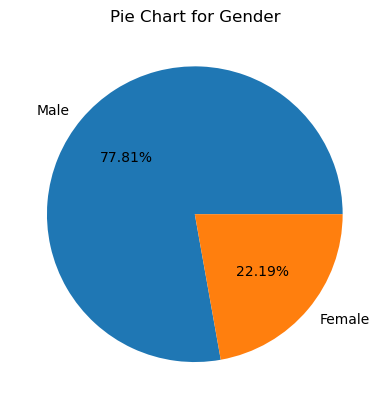

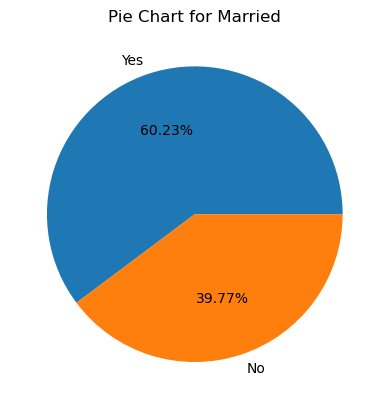

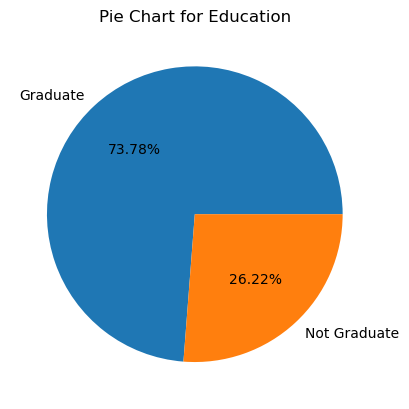

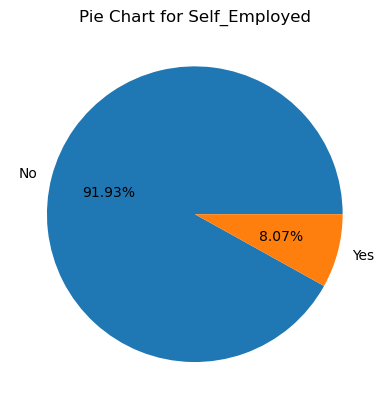

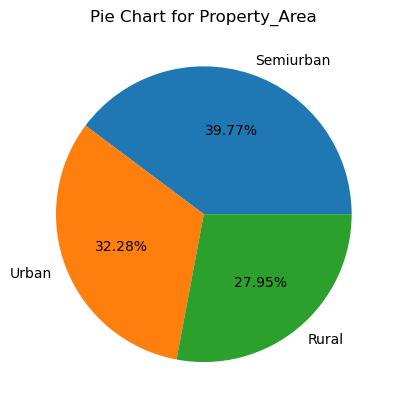

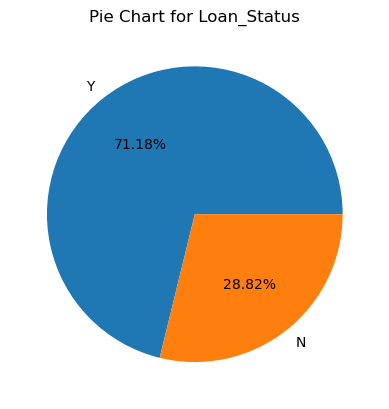

catagorical columns using pie chart


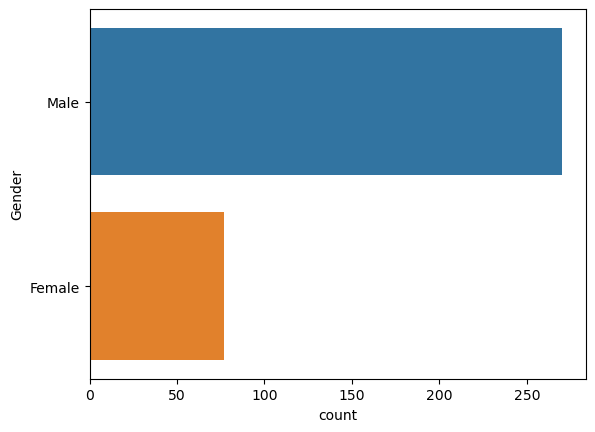

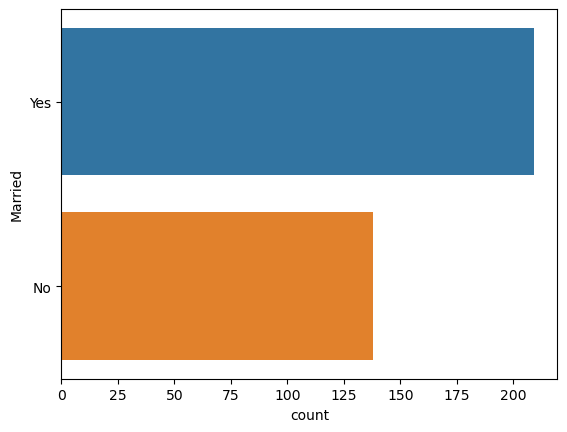

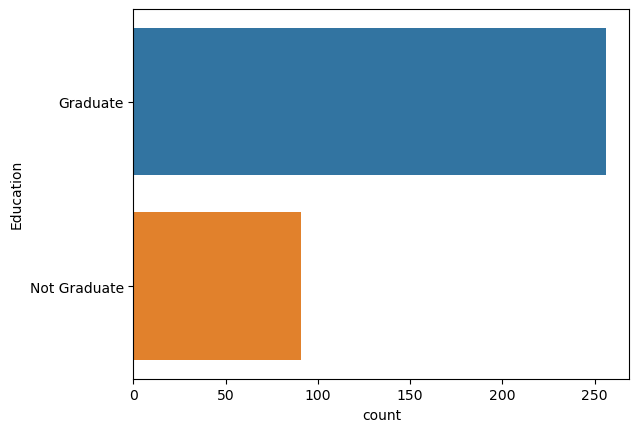

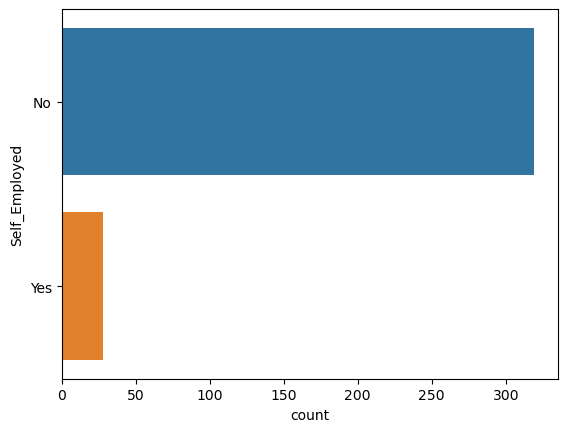

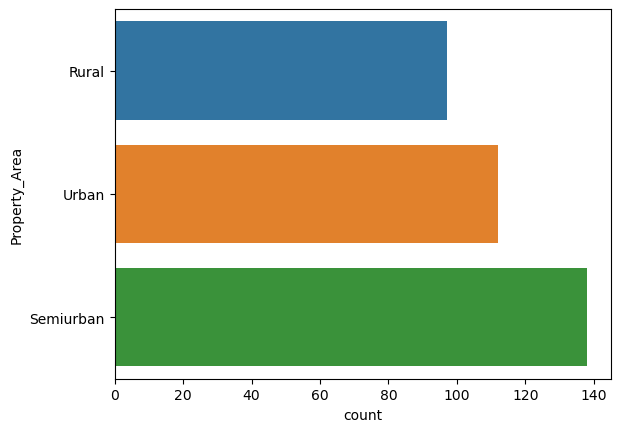

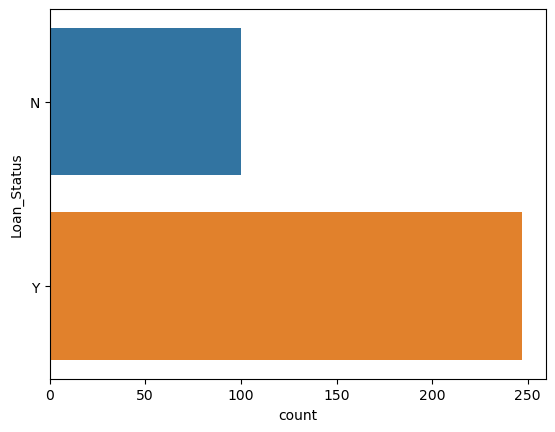

In [9]:
#Make univariate graphs (i.e., graphs based on single variable)
nmc=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']#nmc=numerical
#1- numirecal columns using histplot :
print("numircal data in histograghs")
for col in nmc:
    plt.figure()
    plt.hist(df[col])
    plt.title(col)
    plt.show()

#2-catagorical columns using pie chart
print("catagorical columns using pie chart")
for col in categorical_columns:
    counts = df[col].value_counts()
    plt.figure()
    plt.pie(counts, labels=counts.index,autopct='%.2f%%')
    plt.title(f'Pie Chart for {col}')
    plt.show()
#3-catagorical columns using count plot
print("catagorical columns using pie chart")
for col in categorical_columns:
    plt.figure()
    sns.countplot(y=col,data=df)
    plt.show()

USING BOXPLOTS


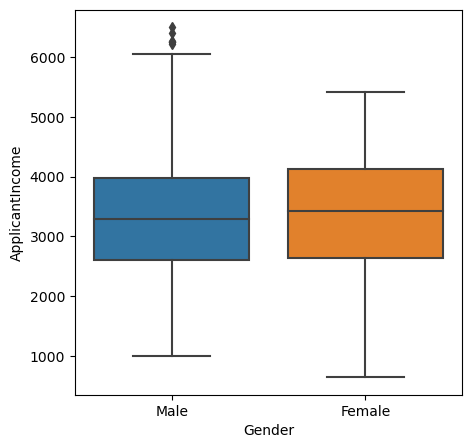

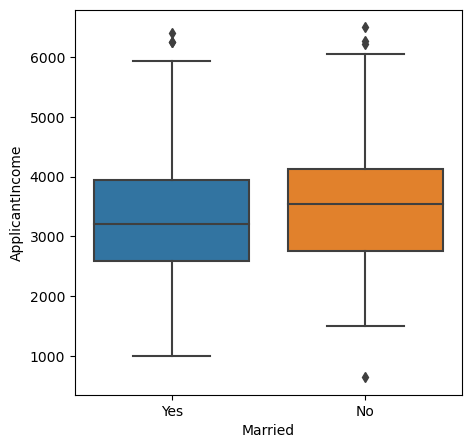

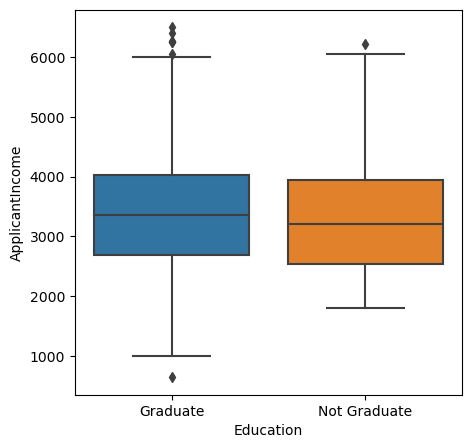

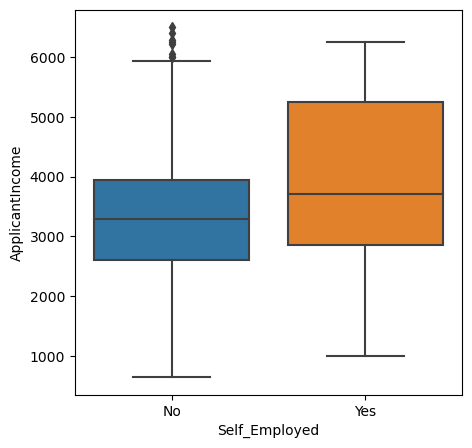

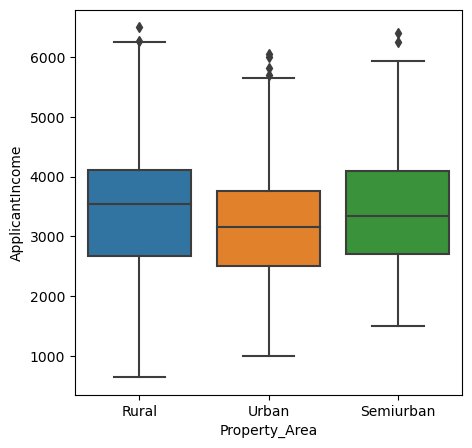

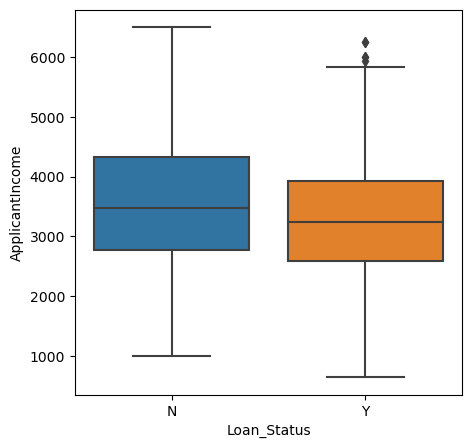

In [10]:
#Prepare bivariate plots (i.e., plots based on two variables). (1)

## using boxplots ##
print("USING BOXPLOTS")
for col in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=col, y='ApplicantIncome', data=df)
    plt.show()



USING PCA


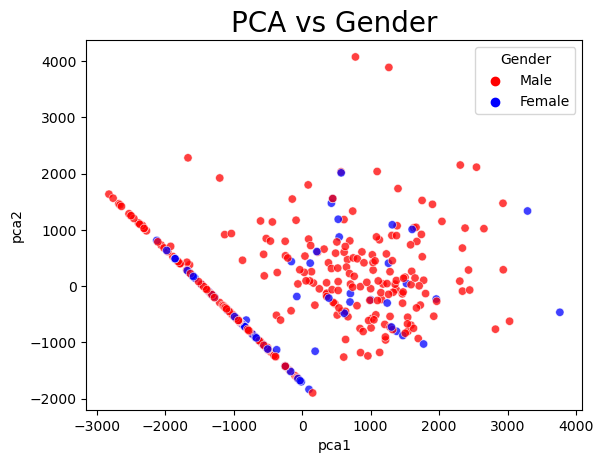

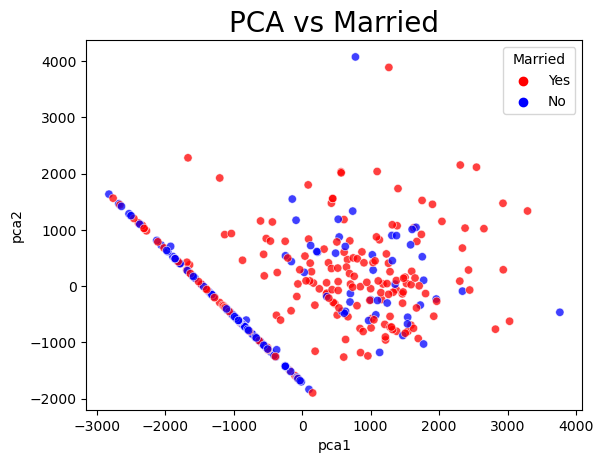

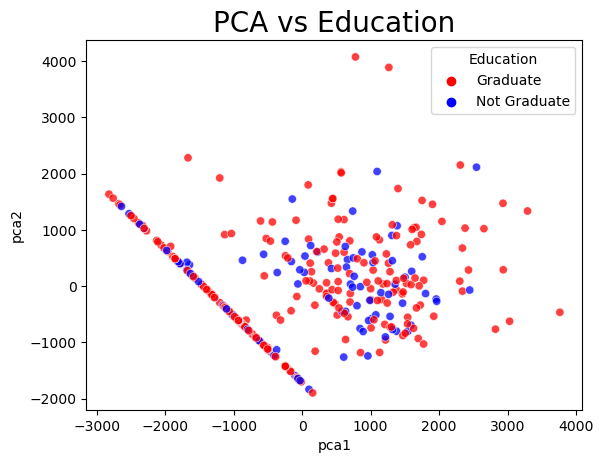

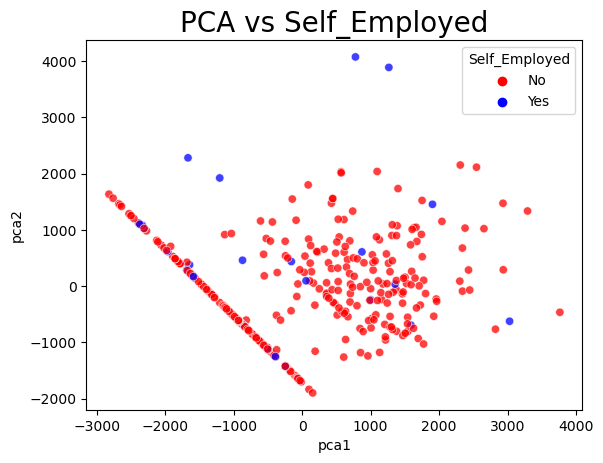

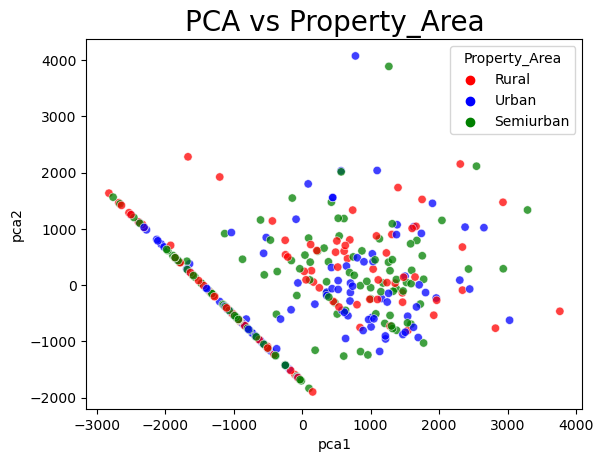

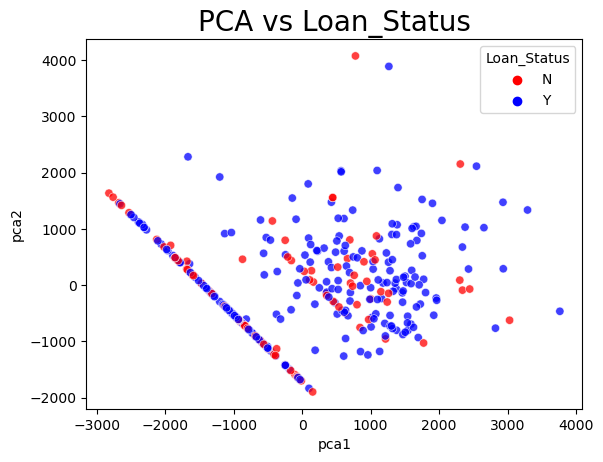

In [11]:
#Prepare bivariate plots (i.e., plots based on two variables). (2)


## using pca ##
print("USING PCA")
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # get pca model
principalComponents = pca.fit_transform(df[nmc]) # get two components
df['pca1'] = principalComponents[:,0]
df['pca2'] = principalComponents[:,1]
    

plt.figure()
sns.scatterplot(x='pca1',y='pca2',
            hue='Gender', palette=['r','b'],
            alpha=0.75,
            data=df)
plt.title('PCA vs Gender', fontsize = 20)
plt.show()


plt.figure()
sns.scatterplot(x='pca1',y='pca2',
            hue='Married', palette=['r','b'],
            alpha=0.75,
            data=df)
plt.title('PCA vs Married', fontsize = 20)
plt.show()


plt.figure()
sns.scatterplot(x='pca1',y='pca2',
            hue='Education', palette=['r','b'], 
            alpha=0.75,
            data=df)
plt.title('PCA vs Education', fontsize = 20)
plt.show()


plt.figure()
sns.scatterplot(x='pca1',y='pca2',
            hue='Self_Employed', palette=['r','b'],
            alpha=0.75,
            data=df)
plt.title('PCA vs Self_Employed', fontsize = 20)
plt.show()


plt.figure()
sns.scatterplot(x='pca1',y='pca2',
            hue='Property_Area', palette=['r','b','g'],
            alpha=0.75,
            data=df)
plt.title('PCA vs Property_Area', fontsize = 20)
plt.show()


plt.figure()
sns.scatterplot(x='pca1',y='pca2',
            hue='Loan_Status', palette=['r','b'], 
            alpha=0.75,
            data=df)
plt.title('PCA vs Loan_Status', fontsize = 20)
plt.show()

In [12]:
# deleting the PCA from the dataframe so that they don't interfere with the other models
df.drop('pca1',inplace=True,axis=1)
df.drop('pca2',inplace=True,axis=1)

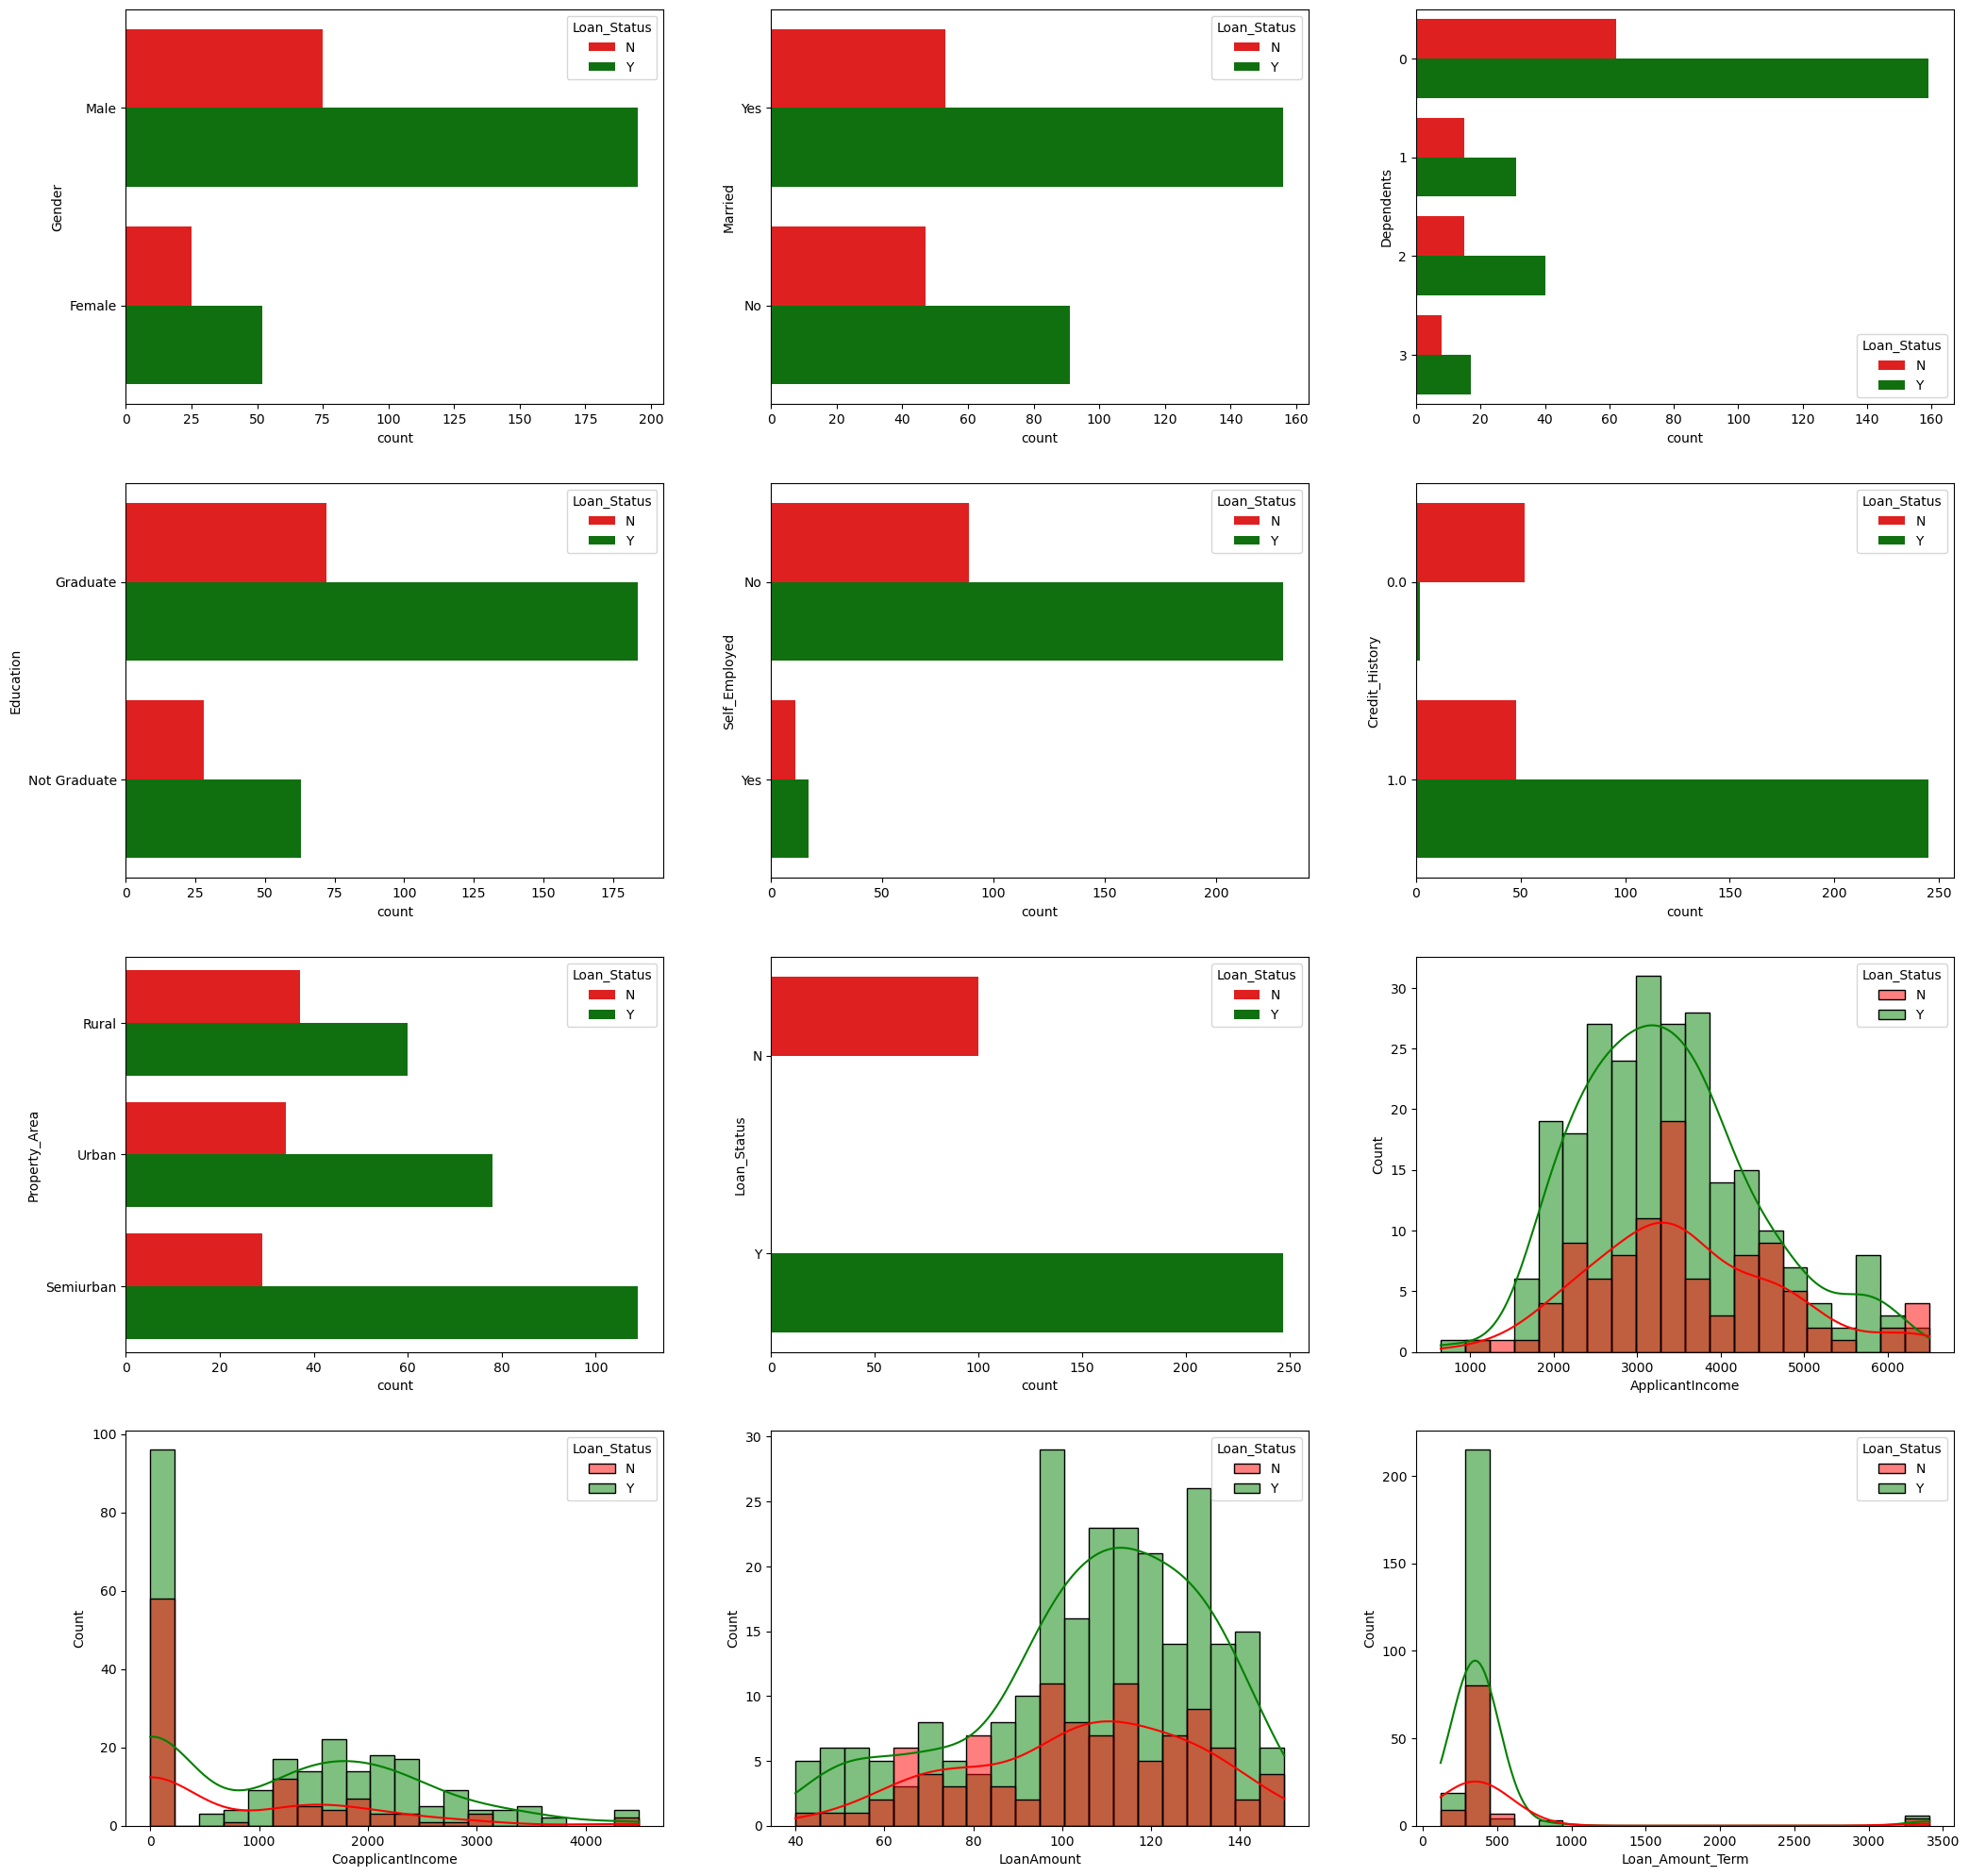

<Figure size 640x480 with 0 Axes>

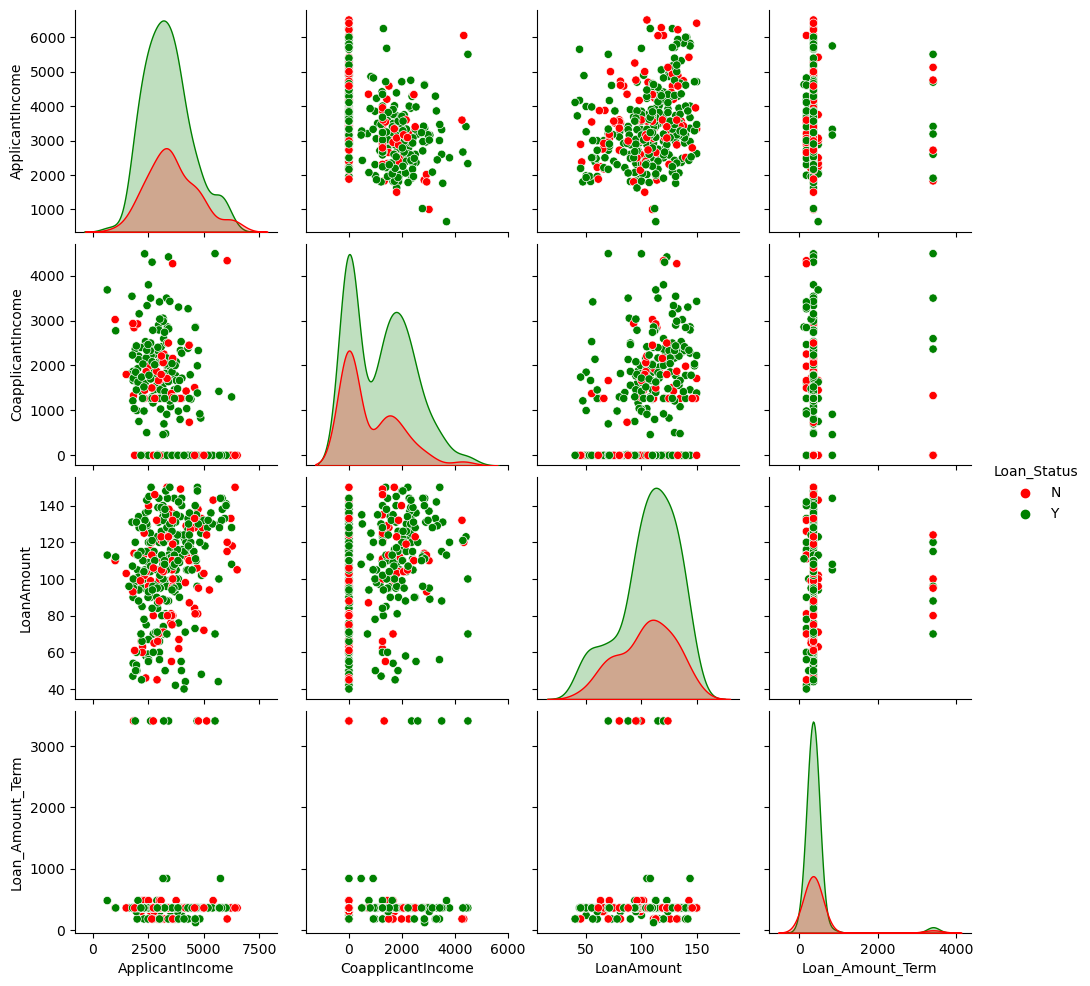

In [13]:
# ploting Portray advanced graphs 
nmc=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']#nmc=numerical
ctgc = df.drop(nmc,axis=1).columns
nCol=3
nRow=4
fig,axes = plt.subplots(nRow, nCol,figsize=(25,25))
for ind,col in enumerate(ctgc):
    sns.countplot(y=col,data=df,hue='Loan_Status',ax=axes.flatten()[ind],palette=['r','g'])
for ind,col in enumerate(nmc):
    sns.histplot(x=col,bins=20,hue='Loan_Status',kde=True,data=df,palette=['r','g'],ax=axes.flatten()[ind+8])
plt.show()
plt.figure()
sns.pairplot(vars=nmc,hue ='Loan_Status',data=df,palette=['r','g'])
plt.show()

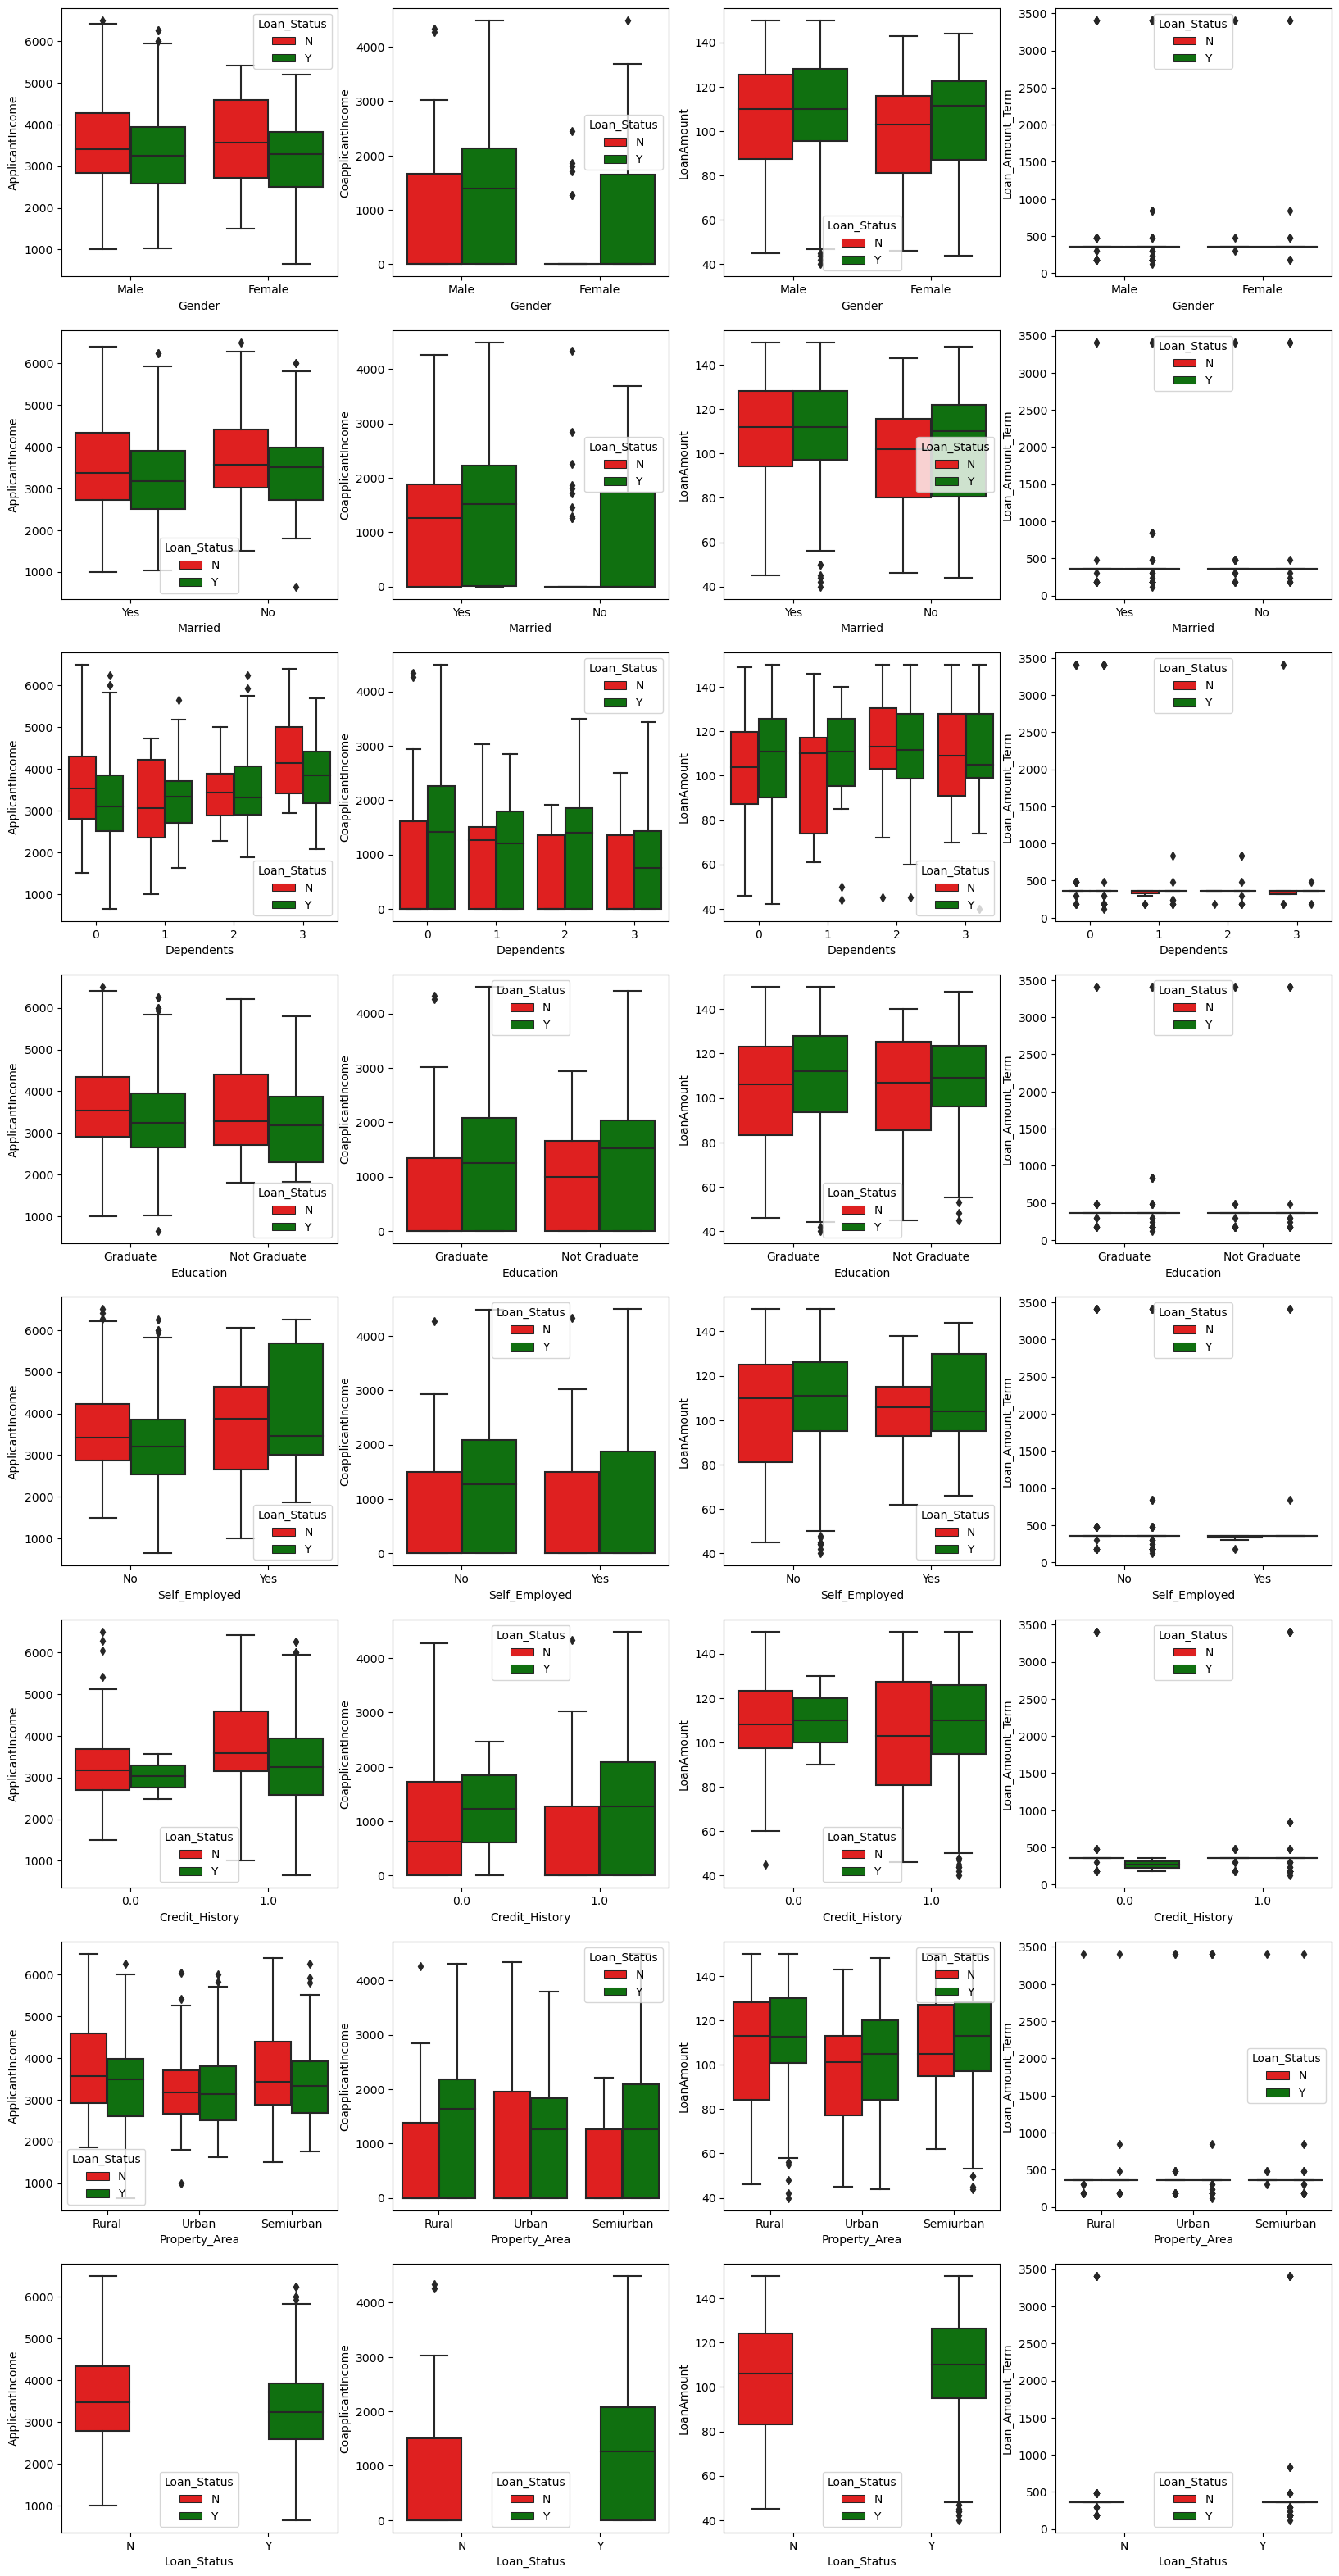

In [14]:
# ploting Portray advanced graphs 
fig,axes = plt.subplots(len(ctgc), len(nmc), figsize=(20,40))
for i,nC in enumerate(nmc):
    for j,cC in enumerate(ctgc):
        sns.boxplot(x=cC,y=nC,hue='Loan_Status', ax=axes[j][i],data=df,palette=['r','g'])
plt.show()

In [15]:
# encoding categorical data into numerical form
from sklearn.preprocessing import LabelEncoder
display(df)

encoder1 = LabelEncoder()
for i in ['Gender','Married','Self_Employed','Credit_History','Property_Area','Loan_Status','Dependents']:
    encoder1.fit(df[i])
    df[i]=encoder1.transform(df[i])

Education_mapping = {'Not Graduate':0, 
        'Graduate':1}

df['Education'] = df['Education'].map(Education_mapping)

display(df.head())

Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0      Male     Yes           1      Graduate            No           4583.0   
1      Male     Yes           0      Graduate           Yes           3000.0   
2      Male     Yes           0  Not Graduate            No           2583.0   
3      Male      No           0      Graduate            No           6000.0   
4      Male     Yes           0  Not Graduate            No           2333.0   
..      ...     ...         ...           ...           ...              ...   
376    Male     Yes           3      Graduate            No           5703.0   
377    Male     Yes           0      Graduate            No           3232.0   
378  Female      No           0      Graduate            No           2900.0   
379    Male     Yes           3      Graduate            No           4106.0   
380  Female      No           0      Graduate           Yes           4583.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          1508.000000       128.0             360.0             1.0   
1             0.000000        66.0             360.0             1.0   
2          2358.000000       120.0             360.0             1.0   
3             0.000000       141.0             360.0             1.0   
4          1516.000000        95.0             360.0             1.0   
..                 ...         ...               ...             ...   
376           0.000000       128.0             360.0             1.0   
377        1267.005289       108.0             360.0             1.0   
378           0.000000        71.0             360.0             1.0   
379           0.000000        40.0             180.0             1.0   
380           0.000000       133.0             360.0             0.0   

    Property_Area Loan_Status  
0           Rural           N  
1           Urban           Y  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
376         Urban           Y  
377         Rural           Y  
378         Rural           Y  
379         Rural           Y  
380     Semiurban           N  

[347 rows x 12 columns]

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1           1          1              0           4583.0   
1       1        1           0          1              1           3000.0   
2       1        1           0          0              0           2583.0   
3       1        0           0          1              0           6000.0   
4       1        1           0          0              0           2333.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             1508.0       128.0             360.0               1   
1                0.0        66.0             360.0               1   
2             2358.0       120.0             360.0               1   
3                0.0       141.0             360.0               1   
4             1516.0        95.0             360.0               1   

   Property_Area  Loan_Status  
0              0            0  
1              2            1  
2              2            1  
3              2            1  
4              2            1

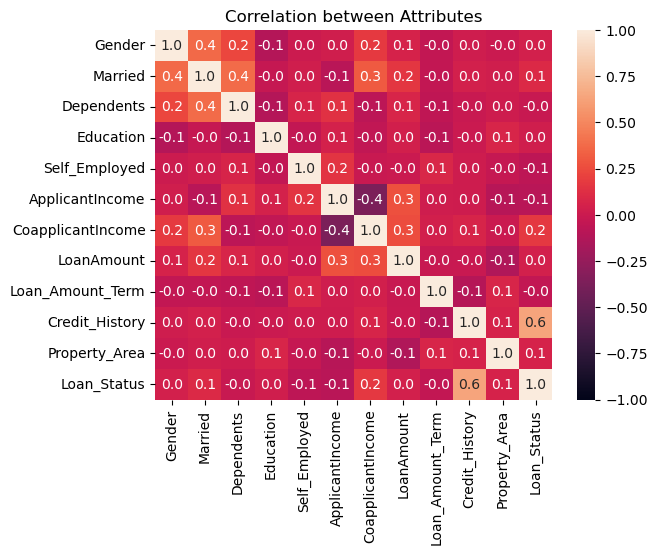

there might exist a very waek relation between Applicantincome and Coapplicatincome variables
In addition, there might exist a relation between credit history and loan status


In [16]:
#  Assising the relation between the variables
corr = df.corr()
plt.figure()
sns.heatmap(corr,vmin=-1,vmax=1,annot=True,fmt='.1f')
plt.title("Correlation between Attributes")
plt.show()
print("there might exist a very waek relation between Applicantincome and Coapplicatincome variables\nIn addition, there might exist a relation between credit history and loan status")

In [17]:
print('Summarise of findings: since the label (Loan_Status) is catagorical and most of the catagorical features have only 2 unique values classification models is the best method to use')

Summarise of findings: since the label (Loan_Status) is catagorical and most of the catagorical features have only 2 unique values classification models is the best method to use


## Using The Decision Tree Model

In [18]:
# Splitting the data
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
display(y_test)
np.unique(y_test, return_counts=True)

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

(array([0, 1]), array([24, 81], dtype=int64))

In [19]:
# Scaling the data to improve the performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Showing the tree:
from sklearn import tree
dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
dtClf = dtClf.fit(X_train,y_train)

import matplotlib.pyplot as plt
plt.figure(figsize =(10,10),dpi=1000)
tree.plot_tree(dtClf,feature_names=df.columns[:-1].tolist(),class_names=['0','1','2'],filled=True,rounded=True); 
plt.show()

In [21]:
# Printing the results:
dt_y_pred = dtClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.utils.multiclass import balanced_accuracy_score

print("Decision Tree: \n")
print("Accuracy:=", accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred))

# Multiple metrics report 
print("\nClassification Report:")
print(classification_report(y_test, dt_y_pred))

# Balanced Accuracy
#balanced_accuracy = balanced_accuracy_score(y_test, dt_y_pred)
#print("\nBalanced Accuracy:", balanced_accuracy)


Decision Tree: 

Accuracy:= 0.8285714285714286
Confusion Matrix:= 
 [[17  7]
 [11 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.71      0.65        24
           1       0.91      0.86      0.89        81

    accuracy                           0.83       105
   macro avg       0.76      0.79      0.77       105
weighted avg       0.84      0.83      0.83       105



## Naive Base Model

In [22]:
# Printing the results
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
NBClf = GaussianNB()   
NBClf.fit(X_train,y_train)
print("Class 1:=", NBClf.classes_[0],"\t Class 2:=", NBClf.classes_[1])

NB_y_pred = NBClf.predict(X_test)

# Multiple metrics report
print("NB for Numerical Data: \n")
print(classification_report(y_test, NB_y_pred))
print("Accuracy:=",  accuracy_score(y_test, NB_y_pred))
# Calculate Confusion Matrix (already included in your code)
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred))

Class 1:= 0 	 Class 2:= 1
NB for Numerical Data: 

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        24
           1       0.86      0.94      0.90        81

    accuracy                           0.84       105
   macro avg       0.78      0.72      0.74       105
weighted avg       0.83      0.84      0.83       105

Accuracy:= 0.8380952380952381
Confusion Matrix:= 
 [[12 12]
 [ 5 76]]


## Random Forest Model

In [23]:
# creating the random forest model
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=6,criterion='entropy', random_state=1832)
rf = rf.fit(X_train, y_train)


fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (10,10), dpi=1000)
for index,axis in enumerate(axes.flatten()):
    tree.plot_tree(rf.estimators_[index],class_names=['no','yes'],filled = True,ax = axis,max_depth=3)
    axis.set_title('Estimator: ' + str(index+1), fontsize = 11)

In [24]:
# estimating the accuracy of the random forest model
dt_y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision random forest: \n")
print("Accuracy:=",  accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred) )

Decision random forest: 

Accuracy:= 0.9142857142857143
Confusion Matrix:= 
 [[17  7]
 [ 2 79]]


5. Communicating results
   
Summary

We are analysing a dataset that contains information about past loan applicants, including their income, loan amount, credit history, and other factors relevant to loan approval decisions. The goal of the analysis is to identify which future applicant should be approved or rejected. We found our data in kaggle in the following link: https://www.kaggle.com/datasets/bsugiarto9/loan-status-prediction-with-added-nans?resource=download

Data Preperation: 
The data contains the following columns: Unnamed: 0, Loan_ID, Gender, Married, Dependents (Number of persons depending on the client), Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term (in months), Credit_History, Property_Area (Semiurban, Urban, Rural), Loan_Status

We removed Unnamed: 0, and loan_ID column as they do not provide useful information. We fixed some inconsistencies in loan_amount_term and Dependents. for missing data we replaced missing categorical data with the mode and missing numerical data with the mean. The number of missing data does
not exceed 10 out of 381 elements in average. outliers from the following columns: ApplicantIncome, CoapplicantIncome and LoanAmount were removed.


Model planning:
From the data summary it can be observed that mean of the applicant income is 
$3426 and the average loan amount is 106 thousand. 78% of the applicants are male and most applicants are not self_employed. 71% of applicants loan requests were accepted. Plotting the data with boxplots we found some interesting information. The mean of applicants income for female applicants is slightly higher than male applicants. Moreover, the mean of applicants income that were rejected is higher than those who were accepted. The mean of
loan amount for approved applicants is higher than the rejected applicants for
both males and females. The mean of loan income for self employed.
We examined a couple of classification techniques and settled on random forest
model with 91% accuracy.

Conclusion:
There are multiple factors the decides the approval or rejection of the loan.
The applicant income is not the only factor, but rather a compentaion of the
credit history, applicant income, loan amount and then the other factors.



6. Operationalize

a. General Guidelines for Adopting the Methodology:

Data Preparation:
- Ensure the dataset is properly formatted and contains relevant columns for analysis.
- Remove unnecessary columns
- Fix any inconsistencies in data 
- Handle missing data by replacing missing categorical data with the mode and missing numerical data with the mean.
- Remove outliers that may negatively affect the analysis.

Model Planning:
- Understand the type of your data (numerical, categorical) and the main trends in the data
- choose a couple of models depending on the type of the problem (regression, classification ..)
- split the data into training and testing data
- Build the models
- Examine the accuracy
- Choose the model with the heighest accuracy
- Be careful of overfitting

Finally, communicate the result by writting a summary and mention key trends and relations.
                                                    

b. Problems that may occur in the implementation of selected methodology
- Too many missing data resulting in the loss of information
- Removing the outliers sometimes could result in losing information
- overfitting 

